# Projections in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: A projection is a linear transformation that maps a vector onto a subspace, typically in a way that minimizes the distance between the original vector and its image in the subspace. Projections are critical in AI/ML for tasks like dimensionality reduction, data approximation, and optimization, as they allow vectors to be represented in lower-dimensional spaces while preserving key properties.

**Mathematical Definition**:
- A linear transformation $P: V \to V$ is a projection if it is idempotent, i.e., $P^2 = P$.
- The orthogonal projection of $\mathbf{x} \in \mathbb{R}^n$ onto subspace $W \subseteq \mathbb{R}^n$ is the vector $\mathbf{p} \in W$ that minimizes the Euclidean distance $\|\mathbf{x} - \mathbf{p}\|$, with $\mathbf{x} - \mathbf{p}$ orthogonal to $W$.
- If $W$ is spanned by orthonormal basis $\{\mathbf{u}_1, \dots, \mathbf{u}_k\}$, then:
  $$
  \text{proj}_W(\mathbf{x}) = \sum_{i=1}^k (\mathbf{x} \cdot \mathbf{u}_i) \mathbf{u}_i
  $$
- Projection matrix for orthonormal basis $\mathbf{Q}$: $\mathbf{P} = \mathbf{Q} \mathbf{Q}^T$.
- For general basis $\mathbf{A}$: $\mathbf{P} = \mathbf{A} (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T$.

**Geometric Interpretation**: The orthogonal projection is the "shadow" of a vector onto a subspace along the perpendicular direction, minimizing the error.

**Examples**:
- Projecting $[3, 4]$ onto the x-axis (span$[1, 0]$) yields $[3, 0]$.
- In ML, projections in PCA map high-dimensional data onto a lower-dimensional subspace.

**Relevance in Mathematics**:
- **Subspace Approximation**: Map vectors to subspaces while minimizing error.
- **Decomposition**: Split vectors into components in a subspace and its orthogonal complement.
- **Geometric Analysis**: Understand distances and angles in vector spaces.
- **Matrix Factorization**: Support decompositions like QR or SVD.

**Relevance in AI/ML**:
- **Dimensionality Reduction**: Map high-dimensional data to lower-dimensional subspaces.
- **Data Approximation**: Minimize error in fitting or compression.
- **Optimization**: Project gradients or solutions onto feasible subspaces.
- **Geometric Insights**: Reveal data structure through projections.

**Applications Overview**:
- **PCA**: Project data onto principal components.
- **Least Squares Regression**: Project targets onto column space of features.
- **Image Compression**: Project data onto low-dimensional subspaces.
- **Signal Processing**: Separate signal from noise.
- **Neural Networks**: Constrain weight updates.
- **Spectral Clustering**: Project data onto eigenvector subspaces.

## Core Concepts and Derivations
This section covers orthogonal projections, projection matrices, orthogonal complements, and non-orthogonal projections, with examples, derivations, and visualizations.

### 2.1 Orthogonal Projections
**Definition**: An orthogonal projection maps a vector onto a subspace such that the error vector is perpendicular to the subspace.

**Explanation**: Orthogonal projections ensure the shortest distance between the vector and the subspace, making them optimal for approximation. They are used in ML for minimizing errors in data fitting or reduction.

**Derivation**: For subspace $W$ with orthonormal basis $\{\mathbf{u}_1, \dots, \mathbf{u}_k\}$, the projection $\mathbf{p}$ satisfies $\mathbf{x} - \mathbf{p} \perp W$, so $\mathbf{u}_i \cdot (\mathbf{x} - \mathbf{p}) = 0$, leading to $\mathbf{p} = \sum_{i=1}^k (\mathbf{x} \cdot \mathbf{u}_i) \mathbf{u}_i$.

**Properties**:
- Idempotence: $P^2 = P$.
- Symmetry: $P^T = P$.
- Orthogonality of Error: $\mathbf{x} - P\mathbf{x} \perp W$.

**Why Necessary**:
- **Error Minimization**: Minimizes $L_2$ norm error in approximations.
- **Dimensionality Reduction**: Enables optimal projection in PCA.
- **Data Fitting**: Minimizes residuals in regression.
- **Noise Reduction**: Projects signals onto subspaces to remove noise.

**Example**: Projecting $[3, 4]$ onto the x-axis (span$[1, 0]$) yields $[3, 0]$.

**ML Use-Case**: In PCA, orthogonal projections reduce dimensionality.

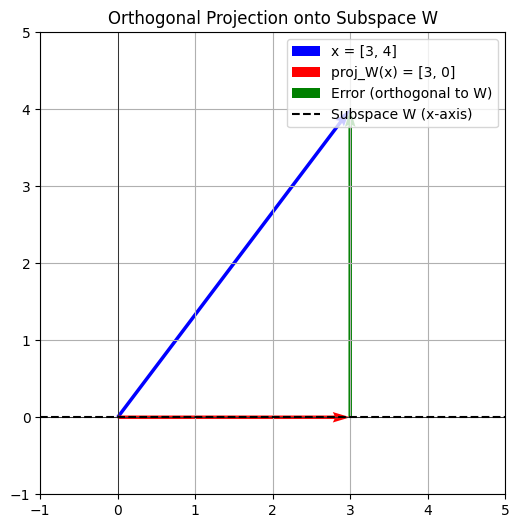

Projection of x onto u: [3. 0.]
Error vector: [0. 4.]
Error orthogonal to u? (dot product ~0): True


In [1]:
# Orthogonal Projection Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define vector and subspace basis
x = np.array([3, 4])
u = np.array([1, 0])  # Basis for subspace W (x-axis)
u_norm = u / np.linalg.norm(u)

# Compute projection
proj_x = np.dot(x, u_norm) * u_norm
error = x - proj_x

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x = [3, 4]')
plt.quiver(0, 0, proj_x[0], proj_x[1], angles='xy', scale_units='xy', scale=1, color='red', label='proj_W(x) = [3, 0]')
plt.quiver(proj_x[0], proj_x[1], error[0], error[1], angles='xy', scale_units='xy', scale=1, color='green', label='Error (orthogonal to W)')
plt.plot([-1, 5], [0, 0], 'k--', label='Subspace W (x-axis)')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Orthogonal Projection onto Subspace W')
plt.legend()
plt.show()

print("Projection of x onto u:", proj_x)
print("Error vector:", error)
print("Error orthogonal to u? (dot product ~0):", np.abs(np.dot(error, u_norm)) < 1e-10)

### 2.2 Projection Matrices
**Definition**: A projection matrix $\mathbf{P}$ represents the linear transformation that projects vectors onto a subspace. For orthonormal basis $\mathbf{Q}$, $\mathbf{P} = \mathbf{Q} \mathbf{Q}^T$.

**Explanation**: The projection matrix transforms any vector $\mathbf{x}$ to its projection $\mathbf{P} \mathbf{x}$, which lies in the subspace. This is efficient for batch computations in ML.

**Derivation**: For orthonormal $\mathbf{Q}$, the projection is $\sum (\mathbf{x} \cdot \mathbf{u}_i) \mathbf{u}_i = \mathbf{Q} (\mathbf{Q}^T \mathbf{x})$, so $\mathbf{P} = \mathbf{Q} \mathbf{Q}^T$. For general basis $\mathbf{A}$, derive from minimizing $\|\mathbf{x} - \mathbf{A} \mathbf{c}\|^2$, leading to $\mathbf{c} = (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T \mathbf{x}$, thus $\mathbf{P} = \mathbf{A} (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T$.

**Properties**:
- Idempotence: $\mathbf{P}^2 = \mathbf{P}$.
- Symmetry: $\mathbf{P}^T = \mathbf{P}$ for orthogonal projections.
- Eigenvalues: 0 or 1.

**Why Necessary**:
- **Batch Computations**: Project multiple vectors efficiently.
- **Dimensionality Reduction**: Used in PCA projection matrices.
- **Data Fitting**: Minimize errors in regression.
- **Stability**: Orthonormal bases simplify inverses and computations.

**Example**: For subspace spanned by [1, 0] and [0, 1], $\mathbf{P} = \mathbf{I}$ (projects onto $\mathbb{R}^2$).

**ML Use-Case**: In image compression, projection matrices reduce data dimensions.

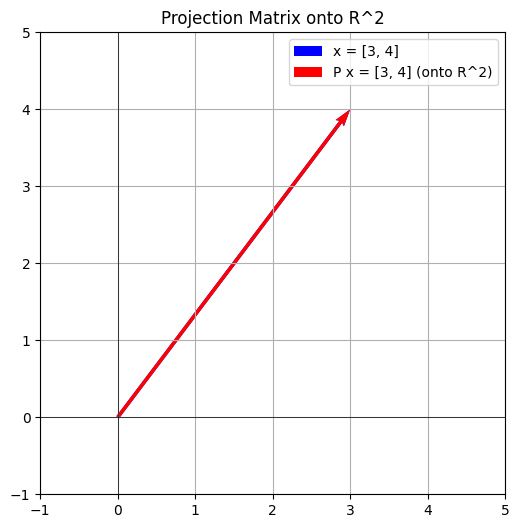

Projection matrix P:
 [[1 0]
 [0 1]]
Projection of x: [3 4]


In [3]:
# Projection Matrix Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define orthonormal basis
Q = np.array([[1, 0], [0, 1]]).T  # For R^2
P = np.dot(Q, Q.T)  # Projection matrix (identity)
x = np.array([3, 4])
proj_x = np.dot(P, x)

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x = [3, 4]')
plt.quiver(0, 0, proj_x[0], proj_x[1], angles='xy', scale_units='xy', scale=1, color='red', label='P x = [3, 4] (onto R^2)')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Projection Matrix onto R^2')
plt.legend()
plt.show()

print("Projection matrix P:\n", P)
print("Projection of x:", proj_x)

### 2.3 Orthogonal Complement
**Definition**: The orthogonal complement of subspace $W \subseteq \mathbb{R}^n$, denoted $W^\perp$, is:
  $$
  W^\perp = \{ \mathbf{v} \in \mathbb{R}^n \mid \mathbf{v} \cdot \mathbf{w} = 0 \text{ for all } \mathbf{w} \in W \}
  $$

**Explanation**: The orthogonal complement captures directions perpendicular to $W$, with $\mathbb{R}^n = W \oplus W^\perp$.

**Derivation**: For projection $P$, the error $\mathbf{x} - P\mathbf{x}$ is in $W^\perp$, as it is orthogonal to all vectors in $W$ by construction. The dimension is $\dim(W^\perp) = n - \dim(W)$.

**Properties**:
- The projection error lies in $W^\perp$.
- $W \cap W^\perp = \{\mathbf{0}\}$.
- $(W^\perp)^\perp = W$.

**Why Necessary**:
- **Error Minimization**: Ensures the projection minimizes distance.
- **Decomposition**: Splits vectors into subspace and complement components.
- **Noise Reduction**: Separates signal (in $W$) from noise (in $W^\perp$).
- **Stability**: Orthogonal decompositions reduce numerical errors.

**Example**: For $W$ spanned by [1, 0], $W^\perp$ is spanned by [0, 1].

**ML Use-Case**: In signal processing, projects signals onto subspaces to remove noise in $W^\perp$.

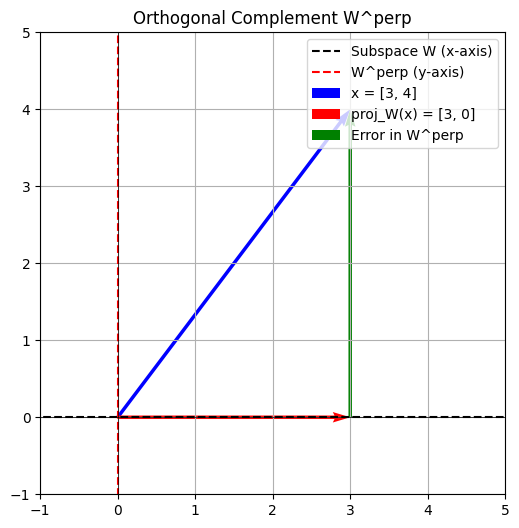

Error vector: [0. 4.]
Error orthogonal to u? (dot product ~0): True


In [4]:
# Orthogonal Complement Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define subspace W (x-axis) and vector x
x = np.array([3, 4])
u = np.array([1, 0])  # Basis for W
u_norm = u / np.linalg.norm(u)
proj_x = np.dot(x, u_norm) * u_norm
error = x - proj_x  # In W^perp

# Visualize
plt.figure(figsize=(6, 6))
plt.plot([-5, 5], [0, 0], 'k--', label='Subspace W (x-axis)')
plt.plot([0, 0], [-5, 5], 'r--', label='W^perp (y-axis)')
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x = [3, 4]')
plt.quiver(0, 0, proj_x[0], proj_x[1], angles='xy', scale_units='xy', scale=1, color='red', label='proj_W(x) = [3, 0]')
plt.quiver(proj_x[0], proj_x[1], error[0], error[1], angles='xy', scale_units='xy', scale=1, color='green', label='Error in W^perp')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Orthogonal Complement W^perp')
plt.legend()
plt.show()

print("Error vector:", error)
print("Error orthogonal to u? (dot product ~0):", np.abs(np.dot(error, u_norm)) < 1e-10)

### 2.4 Non-Orthogonal Projections
**Definition**: A projection is non-orthogonal if the error vector is not perpendicular to the subspace, often used with non-orthonormal bases.

**Explanation**: Non-orthogonal projections are less common but arise when the basis is not orthonormal or in specific optimization problems. They do not minimize the Euclidean distance but may minimize other metrics.

**Derivation**: For basis $\mathbf{A}$, the projection is derived from minimizing a weighted error or using the general formula $\mathbf{P} = \mathbf{A} (\mathbf{A}^T \mathbf{W} \mathbf{A})^{-1} \mathbf{A}^T \mathbf{W}$ for weighted projections, reducing to the orthogonal case when $\mathbf{W} = \mathbf{I}$.

**Properties**:
- Idempotence: $\mathbf{P}^2 = \mathbf{P}$.
- Not necessarily symmetric or orthogonal error.

**Why Necessary**:
- **General Bases**: Useful when orthonormal bases are not available.
- **Custom Metrics**: Minimizes error under non-Euclidean norms (e.g., weighted least squares).
- **Iterative Methods**: Appears in algorithms with non-orthogonal constraints.
- **Specialized Applications**: Used in oblique projections for certain feature extraction techniques.

**Example**: Projecting onto a subspace with non-orthonormal basis $\{[1, 0], [1, 1]\}$.

**ML Use-Case**: In weighted regression, non-orthogonal projections account for varying data importance.

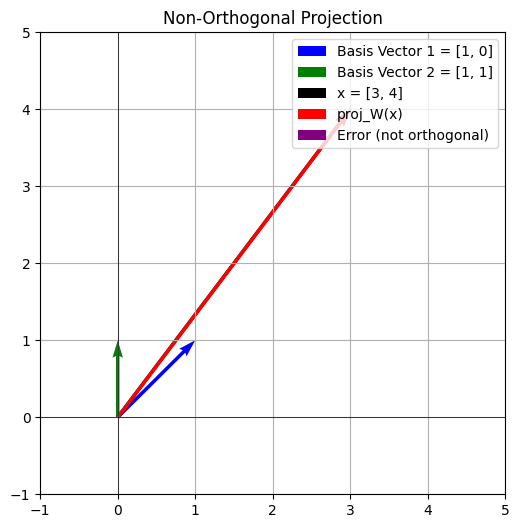

Projection matrix P:
 [[1. 0.]
 [0. 1.]]
Non-orthogonal projection of x: [3. 4.]
Error vector: [0. 0.]


In [5]:
# Non-Orthogonal Projection Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define non-orthonormal basis for subspace W
A = np.array([[1, 1], [0, 1]]).T  # Vectors [1, 0], [1, 1] as columns
x = np.array([3, 4])

# Compute projection matrix
P = A @ np.linalg.inv(A.T @ A) @ A.T
proj_x = P @ x
error = x - proj_x

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, A[0, 0], A[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='Basis Vector 1 = [1, 0]')
plt.quiver(0, 0, A[0, 1], A[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label='Basis Vector 2 = [1, 1]')
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='black', label='x = [3, 4]')
plt.quiver(0, 0, proj_x[0], proj_x[1], angles='xy', scale_units='xy', scale=1, color='red', label='proj_W(x)')
plt.quiver(proj_x[0], proj_x[1], error[0], error[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Error (not orthogonal)')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Non-Orthogonal Projection')
plt.legend()
plt.show()

print("Projection matrix P:\n", P)
print("Non-orthogonal projection of x:", proj_x)
print("Error vector:", error)

## Applications in AI/ML
Projections are applied in various ML tasks:
- **PCA**: Project data onto principal components.
- **Least Squares Regression**: Project targets onto column space of features.
- **Image Compression**: Project data onto low-dimensional subspaces.
- **Signal Processing**: Separate signal from noise.
- **Neural Networks**: Constrain weight updates.
- **Spectral Clustering**: Project data onto eigenvector subspaces.

## Practical ML Examples
Below are coded examples demonstrating projections in ML contexts.

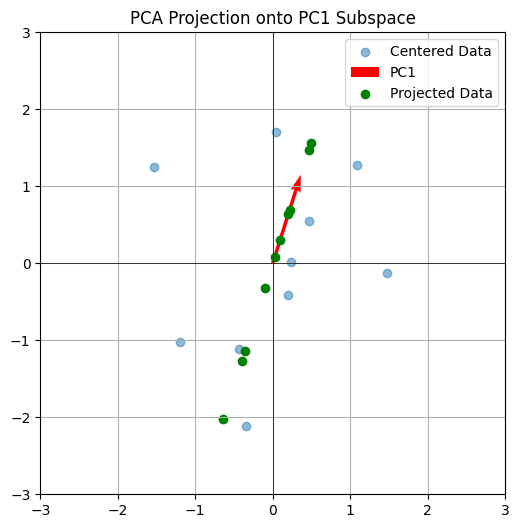

Projection matrix P:
 [[0.09128104 0.28800835]
 [0.28800835 0.90871896]]
Projected data (first few):
 [[-0.40225866 -1.26919953]
 [ 0.21860524  0.68973945]
 [-0.64195158 -2.02547448]]


In [6]:
# Example 1: PCA (Projection for Dimensionality Reduction)
import numpy as np
import matplotlib.pyplot as plt

# Simulate data: 10 samples, 2 features
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10)

# Center data
mean = np.mean(data, axis=0)
centered_data = data - mean

# Compute covariance matrix and eigendecomposition
cov_matrix = np.cov(centered_data.T)
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Projection matrix for first PC
Q = eig_vecs[:, -1:]  # Top eigenvector
P = np.dot(Q, Q.T)  # Projection matrix
proj_data = centered_data @ P

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.5, label='Centered Data')
plt.quiver(0, 0, eig_vecs[0, -1], eig_vecs[1, -1], color='red', scale=5, label='PC1')
plt.scatter(proj_data[:, 0], proj_data[:, 1], color='green', label='Projected Data')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('PCA Projection onto PC1 Subspace')
plt.legend()
plt.show()

print("Projection matrix P:\n", P)
print("Projected data (first few):\n", proj_data[:3])

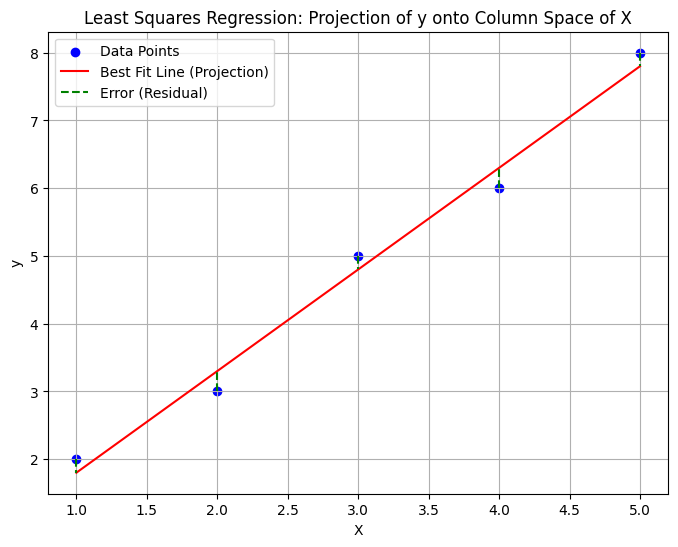

Projected y (best fit values):
 [1.8 3.3 4.8 6.3 7.8]
Errors (residuals):
 [ 0.2 -0.3  0.2 -0.3  0.2]
Sum of squared errors (SSE): 0.2999999999999994


In [8]:
# Example 2: Least Squares Regression (Projection onto Column Space)
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 6, 8])
X_matrix = np.vstack([np.ones(len(X)), X]).T  # Feature matrix with bias term

# Projection matrix onto column space of X_matrix
P = X_matrix @ np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T

# Projected y (best fit)
y_proj = P @ y

# Errors (residuals)
errors = y - y_proj

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_proj, color='red', label='Best Fit Line (Projection)')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_proj[i]], color='green', linestyle='--', label='Error (Residual)' if i == 0 else None)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.title('Least Squares Regression: Projection of y onto Column Space of X')
plt.legend()
plt.show()

print("Projected y (best fit values):\n", y_proj)
print("Errors (residuals):\n", errors)
print("Sum of squared errors (SSE):", np.sum(errors**2))

## Summary
- **Key Concepts**: Orthogonal projections minimize error onto subspaces, represented by projection matrices, with errors in the orthogonal complement. Non-orthogonal projections handle general bases.
- **Mathematical Significance**: Approximate subspaces, decompose vectors, and analyze geometry.
- **AI/ML Relevance**: Support dimensionality reduction, data fitting, and optimization.
- **Next Steps**: Practice computing projections, deriving formulas, and applying to ML tasks.

## Tips and Practice
- **Visualize**: Use Matplotlib (as shown) or GeoGebra (https://www.geogebra.org/) to visualize projections and errors.
- **Practice Problems**:
  1. Compute the orthogonal projection of [3, 4] onto span([1, 1]).
  2. Derive the projection matrix for the basis $\{[1, 0], [0, 1]\}$.
  3. Find the orthogonal complement of span([1, 0]) in $\mathbb{R}^2$.
- **Project Idea**: Implement PCA on a dataset and visualize the projections.
- **Resources**:
  - *Book*: “Linear Algebra and Its Applications” by Gilbert Strang.
  - *Online*: 3Blue1Brown’s “Essence of Linear Algebra” (YouTube), Khan Academy’s Linear Algebra course.
  - *Practice*: MIT OpenCourseWare (18.06 Linear Algebra), NumPy tutorials on Real Python.

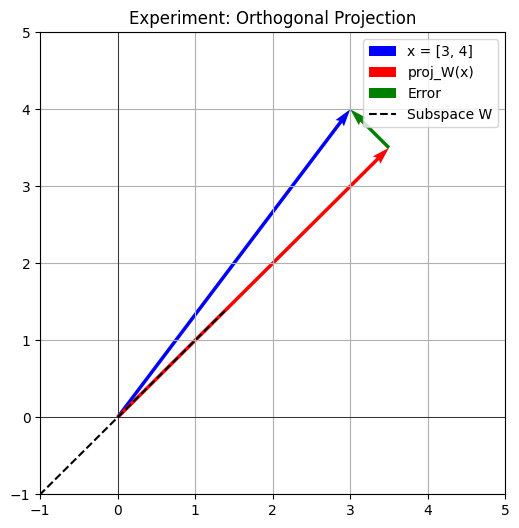

Projection: [3.5 3.5]
Error: [-0.5  0.5]


In [9]:
# Experimentation Zone
# Try defining your own vector and subspace for projection!
import numpy as np
import matplotlib.pyplot as plt

# Define vector and subspace basis
x = np.array([3, 4])  # Change these
u = np.array([1, 1])  # Basis for W
u_norm = u / np.linalg.norm(u)

# Compute projection
proj_x = np.dot(x, u_norm) * u_norm
error = x - proj_x

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x = [3, 4]')
plt.quiver(0, 0, proj_x[0], proj_x[1], angles='xy', scale_units='xy', scale=1, color='red', label='proj_W(x)')
plt.quiver(proj_x[0], proj_x[1], error[0], error[1], angles='xy', scale_units='xy', scale=1, color='green', label='Error')
plt.plot([-2 * u_norm[0], 2 * u_norm[0]], [-2 * u_norm[1], 2 * u_norm[1]], 'k--', label='Subspace W')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Experiment: Orthogonal Projection')
plt.legend()
plt.show()

print("Projection:", proj_x)
print("Error:", error)